## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [31]:
# type your code here
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.3 display the first five rows of the train dataset.

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [34]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [35]:
print(test.shape,train.shape)

(1459, 80) (1460, 81)


### 1.6 Save the 'Id' column

In [36]:
test_id = test['Id']
train_id = train['Id']

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [37]:
test.drop('Id',axis = 1,inplace =True )
train.drop('Id',axis = 1,inplace =True )

### 1.8 check again the data size after dropping the 'Id' variable

In [38]:
# test.head()
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

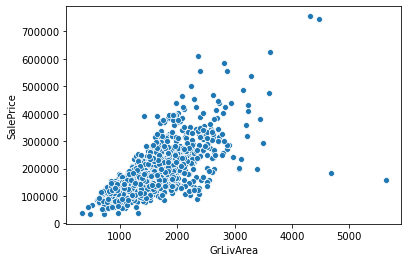

In [39]:
# create subplots 

#create scatter plots for train['GrLivArea'],  train['SalePrice']
train['GrLivArea']
sns.scatterplot(train['GrLivArea'],  train['SalePrice']);

#### observation:


### 1.9 b) Deleting outliers.And your observation?

In [40]:
#Check the graphic again

#create scatterplot for train['GrLivArea'], train['SalePrice']
from scipy.stats import zscore
train['GrLivArea_zcore'] = zscore(train['GrLivArea'])
# train[train['GrLivArea_zcore'] < -3]
train_zero_outliers = train[train['GrLivArea_zcore'] < 3]

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

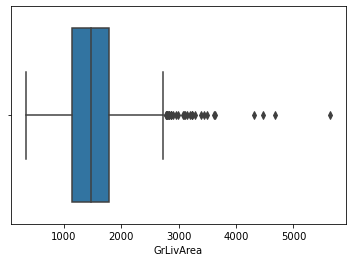

In [46]:
sns.boxplot(train['GrLivArea']);

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

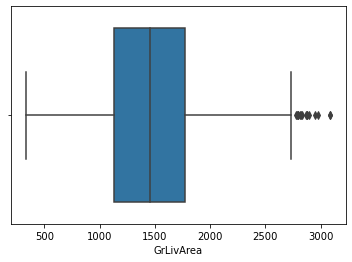

In [45]:
# sns.scatterplot(train_zero_outliers['GrLivArea'],  train_zero_outliers['SalePrice']);
sns.boxplot(train_zero_outliers['GrLivArea']);

## 1.10 Checking the skeweness for saleprice.And your observation?

180921.19589041095 0    140000
dtype: int64 79442.50288288663


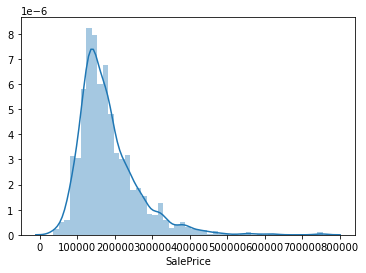

In [52]:
# create histogram for saleprice
# train['SalePrice'].plot(kind = 'hist');
sns.distplot(train['SalePrice']);

# Get the fitted parameters used by the function
print(train['SalePrice'].mean(),train['SalePrice'].mode(),train['SalePrice'].std())
#Now plot the distribution




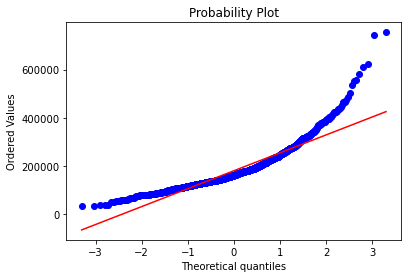

In [51]:
#Get also the QQ-plot
from scipy.stats import probplot
probplot(train['SalePrice'],plot = plt);

### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [55]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train['SalePrice_log'] = train['SalePrice'].apply(lambda x : np.log(x))
train['SalePrice_log']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_log, Length: 1460, dtype: float64

12.024050901109373 0    11.849398
dtype: float64 0.3994518682611646


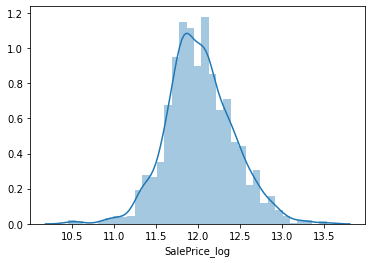

In [57]:
#Check the new distribution 
sns.distplot(train['SalePrice_log'])

# Get the fitted parameters used by the function
print(train['SalePrice_log'].mean(),train['SalePrice_log'].mode(),train['SalePrice_log'].std())

#Now plot the distribution

#Get also the QQ-plot


#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [0]:
#all_data = pd.concat
all_data = pd.concat()


In [0]:
# Drop the SalePrice


### 1.12 Cecking the all Missing Data?

### 1.13 plot the missing values using barplot?

In [0]:
#create subplots

#create barplot for all missing values


### 1.14 check the Data Correlation using heatmap.And your observation?

In [0]:
#Correlation map to see how features are correlated with SalePrice


#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#### MiscFeature : 
data description says NA means "no misc feature"

#### Alley : 
data description says NA means "no alley access"

Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [0]:
# FireplaceQu : data description says NA means "no fireplace"


In [0]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood


In [0]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None


In [0]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [0]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement


In [0]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [0]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.


In [0]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [0]:
#Functional : data description says NA means typical


In [0]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [0]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.


In [0]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [0]:
#SaleType : Fill in again with most frequent which is "WD"


In [0]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None


### 1.17 Check again remaining missing values if any.And your observation?

#### observation:
    

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [0]:
#MSSubClass=The building class


#Changing OverallCond into a categorical variable


#Year and month sold are transformed into categorical features.


#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [0]:

# process columns, apply LabelEncoder to categorical features

# shape        


### 1.19 Introduction to Test and Train


In [0]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

### 1.21 Split the data into train and test set(70/30)?

# The End